# Introduction to MyGrad 

## Introducing MyGrad: Computing the Slope of a Simple Function

[mygrad](https://mygrad.readthedocs.io/en/latest/index.html) is a so-called "automatic differentiation" (a.k.a "autograd") numerical library. This means that `mygrad` is able to calculate results from mathematical functions, and then evaluate the *derivatives* (slopes) of those functions. Note that `mygrad` cannot compute analytical derivatives (i.e. the function that describes the derivative at all points). `mygrad` can only find the derivative evaluated at specified values.

Let's consider an exceedingly-simple function, $f(x) = 2x + 1$. This is a line with a slope of 2. Thus the derivative of this function should be $2$ for all values of $x$. I.e. $\frac{df(x)}{dx} = 2$. Let's see that `mygrad` can produce this result.

First we specify the point, $x$, at which we want to evaluate this function. Let's use $x = 5.0$, and compute $f(5.0)$:

In [3]:
%matplotlib notebook

# run me
import mygrad as mg

# computing: f = 2x + 1, at x = 5.0
x = mg.Tensor(5.0)
f = 2*x + 1
f

Tensor(11.)

In computing $f(5.0)$, `mygrad` constructed a computational graph that tracks all of the numerical inputs and mathematical operations that were responsible for producing this result. Let's visualize the computational graph that is associated with $f(5.0)$:

![title](pics/mygrad_graph.png)

Because `mygrad` stores this computational graph, it knows how $f$ *depends* on $x$. This permits `mygrad` to answer the question:

>"if I increase $x$ slightly (infinitesimally) above $5.0$, by what proportion will $f$ change?

or, equivalently:

>"holding all other variables fixed, what is the slope of $f$ at $x=5$?

also equivalently, and more concisely:

>"What is $\frac{df}{dx}\Bigr\rvert_{x = 5.0}$?"


This computational graph is tied specifically to the the terminal node of the graph, `f`. Let's see that the "creator" of `f` is an instance of mygrad's `Add` class, as depicted above. Evaluate the attribute `f.creator` in the cell below (as it is just an attribute, and not a method, you don't need to "call" it - no parentheses needed):

In [4]:
f.creator # <COGLINE>

We want to compute the derivative of $f$ with respect to $x$; in `mygrad` we do this by invoking `f.backward()`. This says: 
>"Starting with `f` traverse (backwards) through the graph and compute all the derivatives of $f$ with respect to any tensor in the graph."

The values of these derivatives will be stored in `<var>.grad`, where `<var>` is any tensor in the graph. Thus `x.grad` will store the value $\frac{df}{dx}\Bigr\rvert_{x = 5.0}$. Remind yourself, what should this value be?

Invoke `f.backward()` and then inspect `x.grad` (which, like `<var>.creator`, is an attribute).
Note that `x.grad` returns a numpy array, not a mygrad tensor.

In [8]:
# trigger back-propagation and check df/dx
# <COGINST>
f.backward()
x.grad
# </COGINST>

This leads us to a very important practical note: **once you have invoked back-propagation, MyGrad will automatically flush the computational graph involved, removing all** `creator` **references. If a tensor in the computational graph is then involved in another mathematical operation, its gradient will be set to None, to avoid unwittingly accumulating gradients**.

Print `f.creator` now - is it the same as before calling `backward`?
Check that the gradients of `x` and `f` are not `None`, then multiply `f` by `2`.
What are the gradients of `f` and `x` now?
Add `3` to `x`, and once again check the gradients.

In [9]:
# <COGINST>
print(f.creator)
assert f.creator is None
print(f.creator)

print(f.grad)
assert f.grad is not None
assert x.grad is not None

f * 2
print(f.grad)
assert f.grad is None
assert x.grad is not None

x + 3
assert f.grad is None
assert x.grad is None
# </COGINST>

None
None
1.0


AssertionError: 

What should $\frac{df}{dx}\Bigr\rvert_{x = -10.0}$ be? Verify your intuition using `mygrad`, re-doing the steps from above.

In [10]:
# computing: f = 2x + 1, at x = -10.0 and checking df/dx
# <COGINST>
# We are working with a line of slope 2, so the derivative 
# is 2 regardless of the value of x
x = mg.Tensor(-10.0)
f = 2*x + 1
f
f.backward()
x.grad
# </COGINST>

array(2.)

One more interesting observation: after invoking back-propagation, inspect what `f.grad` is. This represents $\frac{df}{df}$, or: 

>"if I increase $f$ slightly (infinitesimally) above its present value, by what proportion will $f$ change?

Given this description of $\frac{df}{df}$, does the value for `f.grad` that you see make sense? Chat with a neighbor about this.

In [11]:
# <COGINST>
# `f.grad` should always be array(1.) - the derivative of any variable with respect 
# to itself is, by definition, 1.
f.grad
# </COGINST>

array(1.)

### Summary 

We have been introduced to `mygrad`, an auto-differentiation library. We saw that this library allows us to perform numerical calculations, and it stores a so-called computational graph that describes that that calculation. This permits `mygrad` to compute the derivatives of the terminal variable in that graph with respect to all of the other variables in that graph. It does this using the process of "back-propagation".




## Understanding MyGrad's Tensor


`mygrad` has a [`Tensor`](https://mygrad.readthedocs.io/en/latest/tensor.html) object, which is nearly identical to NumPy's array; it:
- stores data in an [N-dimensional array-like patterns](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AccessingDataAlongMultipleDimensions.html)
- supports both [basic and advanced indexing](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/BasicIndexing.html) 
- performs computations over arrays of numbers intuitively and efficiently, by leveraging [vectorization](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html)
- supports numpy's semantics of [broadcasting](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Broadcasting.html) operations between tensors of different shapes

Then how do numpy and mygrad differ? Whereas numpy simply performs a computation as necessary and stores no information about which arrays participate in it, as we saw above, mygrad keeps track of the computational graph that its tensors participate in. This is what permits mygrad to perform auto-differentiation (via back-propagation), which is the central purpose of mygrad.


In the cell below, work through [this section of PLYMI](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/IntroducingTheNDarray.html), but convert *all* of the numpy functions and objects to mygrad objects. E.g. instead of `import numpy as np`, write `import mygrad as mg`, and so on. 

You can use multiple cells for this to help organize your code

In [12]:
# >>> import numpy as np
# >>> x = np.arange(9)
# array([0, 1, 2, 3, 4, 5, 6, 7, 8])

# <COGINST>
import mygrad as mg
import numpy as np

x = mg.arange(9)
print(x)
# </COGINST>

Tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [13]:
# # An ND-array belongs to the type `numpy.ndarray`
# >>> type(x)
# numpy.ndarray

# >>> isinstance(x, np.ndarray)
# True

# <COGINST>
print(type(x))

print(isinstance(x, mg.Tensor))
# </COGINST>

<class 'mygrad.tensor_base.Tensor'>
True


In [14]:
# >>> x = x.reshape(3,3)
# >>> x
# array([[0, 1, 2],
#        [3, 4, 5],
#        [6, 7, 8]])

# <COGINST>
x = x.reshape(3, 3)
x
# </COGINST>

Tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [15]:
# >>> np.power(x, 2)  # can also be calculated using the shorthand: x**2
# array([[ 0,  1,  4],
#        [ 9, 16, 25],
#        [36, 49, 64]], dtype=int32)

# <COGINST>
mg.power(x, 2)  # or x ** 2
# </COGINST>

Tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]], dtype=int32)

In [16]:
# >>> np.mean(x, axis=1)
# array([ 1.,  4.,  7.])

# <COGINST>
mg.mean(x, axis=1)
# </COGINST>

Tensor([1., 4., 7.])

For the following cell, try using a numpy-array, `np.array([0., 1., 2.])`, as the exponential for the tensor `x`. It might be surprising that this works! What might the value be of using a numpy-array within a computational graph as opposed to a mygrad tensor? Talk to your neighbors about this and consult with an instructor.

In [17]:
# >>> x ** np.array([0., 1., 2.])
# array([[  1.,   1.,   4.],
#        [  1.,   4.,  25.],
#        [  1.,   7.,  64.]])

# <COGINST>

x ** np.array([0., 1., 2.])
# </COGINST>

Tensor([[ 1.,  1.,  4.],
        [ 1.,  4., 25.],
        [ 1.,  7., 64.]])

<!-- #region -->
One distinct difference between numpy and mygrad is that, whereas you can access individual numbers from a numpy-array:

In [18]:
>>> x = np.array([1, 2, 3])
>>> x[1]  # returns an integer
2

2

indexing into a `Tensor` will *always* return a `Tensor`:

In [22]:
x = mg.Tensor([1, 2, 3])
x[1]  # returns a 0-dimensional Tensor


Tensor(2)

This is because mygrad has to be able to track all of the elements in all of the Tensors to reliable calculate derivatives for the computational graph. If you want to access the number, you can call `.item()` on a 0-dimensional Tensor (or a 0-dimensional numpy array):

In [23]:
x[1].item()


2

<!-- #endregion -->

Read through the [documentation for mygrad's Tensor](https://mygrad.readthedocs.io/en/latest/tensor.html). Among the other details provided there, take note: what does `Tensor.data` store?


## Computing Many Derivatives at Once

Compute $f(x) = 2x + 1$ on the domain $[-1, 1]$ sampling this domain evenly using $10$ points. Use a `mygrad` function instead of a numpy function (hint: many of the numpy creation functions such as `arange` and `linspace` are replicated in `mygrad`, but they return tensors instead of arrays)

In [24]:
# <COGINST>
x = mg.linspace(-1, 1, 10)
f = 2 * x + 1
# </COGINST>

Invoke back-propagation to compute the derivatives of $f$. What type of object is of `x.grad`? What is the shape of `x.grad`. Discuss with your neighbor the following questions: 

- what does each element of `x` represent?
- what does each element of `f` represent?
- what does each element of `x.grad` represent?


<COGINST>
ANSWER:
    
- `x` the ten samples in our domain. 
- `f` stores $2x + 1$ for each value of `x` 
- `x.grad`, then stores the derivative of $f$ evaluated at *each* location of `x`
</COGINST>


Plot $f(x) = x^2$ on the domain $[-1, 1]$, sampling this domain evenly using $1,000$ points. In the same figure, plot $\frac{df}{dx}$.
It is suggested to **plot the underlying data** of each tensor; plotting a tensor itself after calling `backward` will null its gradients (i.e. set `<var>.grad = None`).

Before you render your plot: what should the value of $\frac{df}{dx}$ be at $x=0$ (what is the slope of $x^2$ at the origin?). 

What *sign* should $\frac{df}{dx}$ have for $x < 0$? For $0 < x$?

<IPython.core.display.Javascript object>


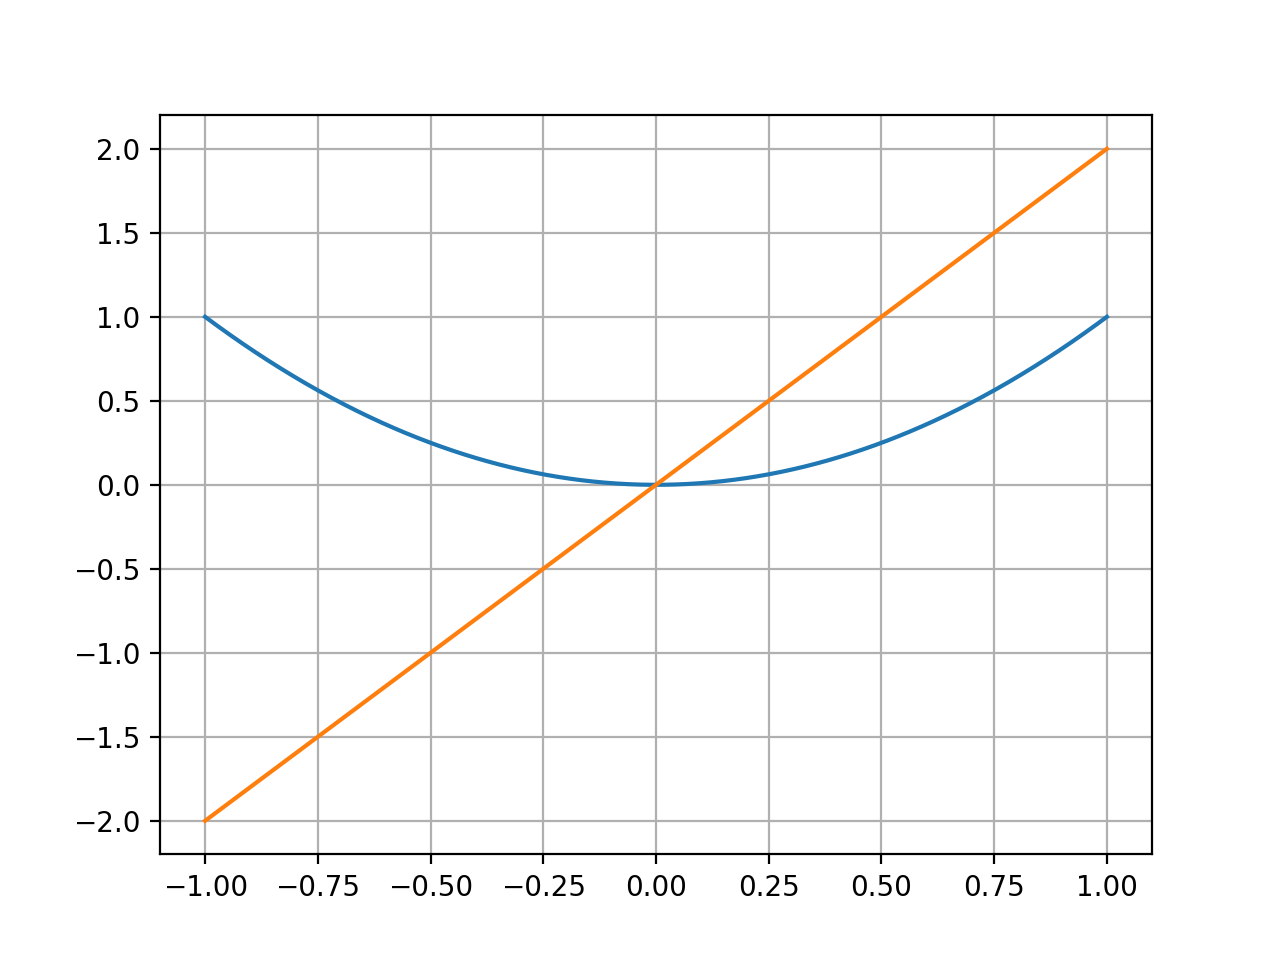

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt

# <COGINST>
fig, ax = plt.subplots()

x = mg.linspace(-1, 1, 1000)
f = x ** 2

ax.plot(x.data, f.data)

f.backward()

ax.plot(x.data, x.grad)
ax.grid()
# </COGINST>

Reflecting on this plot, what is the slope of $f(x)$ at $x=-1$?. Does this plot reaffirm your interpretation of what `x.grad` represents for when `x` stores many numbers? Discuss with a neighbor. Flag an instructor if no one is quite sure.

If you have not taken calculus before, can you deduce what the functional form is of $\frac{df}{dx}$, for $f(x) = x^2$? 


<COGINST>
$\frac{df}{dx}\Bigr\rvert_{x = -1.0} = -2$

`x.grad` stores $\frac{df}{dx}$ evaluated at ${x_0}, {x_1}, ..., {x_{N-1}}$

As one can deduce from the plot, $\frac{df}{dx} = 2x$
</COGINST>